In [223]:
# simulating amm in with different fee amounts
from functools import total_ordering
import pandas as pd
import json
import math
from datetime import datetime
import matplotlib.pyplot as plt
from collections import OrderedDict


In [35]:
def pretty_print_table(df):
    formatted_df = df.copy()  # Create a copy to avoid modifying the original DataFrame
    value_sum = round(sum(formatted_df["value"]), 4)
    for col in formatted_df.select_dtypes(include=['float', 'int']).columns:
        formatted_df[col] = formatted_df[col].apply(lambda x: f"{x:,.4f}")
    print(formatted_df)
    print("                              ", value_sum)

In [188]:
moe_asset = "USD"

time_interval = "5min"  # Choose from "1min", "5min", "30min", "daily"
time_period = "3m"

pool_type = "cpmm"

total_pool = 1000000

"""
if pool_type == "mamm":
    asset_list = ["EUR"]
    total_pool = 600262.78
    specified_weights = {"EUR": 0.5}

elif pool_type == "cpmm":
    # Define multiple pool configurations

pools = [
    {"assets": ["USD", "EUR"], "weights": {"USD": 0.5, "EUR": 0.5}, "total_value": 600262.78},
    {"assets": ["USD", "GBP"], "weights": {"USD": 0.5, "GBP": 0.5}, "total_value": 253664.00},
    {"assets": ["USD", "CHF"], "weights": {"USD": 0.5, "CHF": 0.5}, "total_value": 102094.24},
]
"""
base_asset = "USD"
asset_list = ["GBP", "AUD", "CAD", "NZD"]
bis_volumes = [969, 479, 466, 125]

asset_info_df = pd.DataFrame({"Asset": asset_list, "Volume": bis_volumes})

# Calculate percentage share
bis_total_vol = sum(bis_volumes)
asset_info_df["Weight"] = asset_info_df["Volume"] / (2 * bis_total_vol)
asset_info_df["Value"] = asset_info_df["Weight"] * total_pool
asset_info_df["Value_with_USD"] = asset_info_df["Value"] * 2

print("Asset Allocation Table:")
print(asset_info_df)



value_list = [475232.96, 234919.08, 228543.40, 61304.56]

print(f"Pool sum: {sum(value_list)}")

# Dynamically initialize pools
pools = []
for _, row in asset_info_df.iterrows():
    pool = {
        "type": "cpmm",
        "assets": [base_asset, row["Asset"]],
        "weights": {base_asset: 0.5, row["Asset"]: 0.5},
        "total_value": row["Value_with_USD"]
    }
    pools.append(pool)
    # print(pool)



mamm_pool = {
    "type": "mamm",
    "assets": [base_asset] + asset_list, 
    "weights": {"USD": 0.5},  # Start with USD fixed at 0.5
    "total_value": total_pool
}

# Assign weights dynamically based on calculated percentages
for _, row in asset_info_df.iterrows():
    mamm_pool["weights"][row["Asset"]] = row["Weight"]

pools.append(mamm_pool)
# Print the initialized MAMM Pool
#print("MAMM Pool:")
#print(mamm_pool)

print("\nInitialized Pools:")
for pool in pools:
    print(pool)

Asset Allocation Table:
  Asset  Volume  Weight        Value  Value_with_USD
0   GBP     969  0.2376 237,616.4787    475,232.9573
1   AUD     479  0.1175 117,459.5390    234,919.0780
2   CAD     466  0.1143 114,271.7018    228,543.4036
3   NZD     125  0.0307  30,652.2805     61,304.5611
Pool sum: 1000000.0

Initialized Pools:
{'type': 'cpmm', 'assets': ['USD', 'GBP'], 'weights': {'USD': 0.5, 'GBP': 0.5}, 'total_value': 475232.9573320255}
{'type': 'cpmm', 'assets': ['USD', 'AUD'], 'weights': {'USD': 0.5, 'AUD': 0.5}, 'total_value': 234919.07797940169}
{'type': 'cpmm', 'assets': ['USD', 'CAD'], 'weights': {'USD': 0.5, 'CAD': 0.5}, 'total_value': 228543.40362923002}
{'type': 'cpmm', 'assets': ['USD', 'NZD'], 'weights': {'USD': 0.5, 'NZD': 0.5}, 'total_value': 61304.561059342814}
{'type': 'mamm', 'assets': ['USD', 'GBP', 'AUD', 'CAD', 'NZD'], 'weights': {'USD': 0.5, 'GBP': 0.23761647866601276, 'AUD': 0.11745953898970084, 'CAD': 0.114271701814615, 'NZD': 0.030652280529671408}, 'total_value

In [37]:
"""

1min = 2m
5min = 3m
10min = 3m
30min = 1y
1h = 1y
daily = 20y

c = 1.05, 1.25, 1.5
order_size = 100, 1'000, 10'000
fees = ?

"""

"\n\n1min = 2m\n5min = 3m\n10min = 3m\n30min = 1y\n1h = 1y\ndaily = 20y\n\nc = 1.05, 1.25, 1.5\norder_size = 100, 1'000, 10'000\nfees = ?\n\n"

In [192]:
# Define the path to your Excel file
file_path = f"source/eikon source form4.xlsx"  # Update with actual filename
# Load both sheets into a dictionary of DataFrames
sheets = pd.read_excel(file_path, sheet_name=None)
# Check available sheets
print("Sheets in the Excel file:", sheets.keys())
full_df = sheets.get(time_interval)

Sheets in the Excel file: dict_keys(['1d', '30min', '5min', '1min'])


In [110]:
time_col = "Timestamp"
"""
time_period_price_col = "Open"

# Define date ranges for each time interval
date_ranges = {
    "1min": ("22sep", "22dec"),
    "5min": ("22sep", "22dec"),
    "30min": ("22dec2023", "22dec"),
    "daily": ("22dec2004", "22dec"),
}

# Base directory for the historical data files
base_dir = "hist_bidask"

# Validate time interval and get the date range
if time_interval not in date_ranges:
    raise ValueError(f"Invalid time interval: {time_interval}. Choose from {list(date_ranges.keys())}.")

start_date, end_date = date_ranges[time_interval]

# Create a function to construct file paths dynamically
def get_file_path(asset, interval):
    return f"{base_dir}/{asset}_{start_date}_{end_date}_{interval}.xlsx"
"""
#asset_list = ["EUR", "JPY", "GBP", "CNY", "AUD", "CAD", "CHF", "HKD", "SGD", "SEK", "NZD"]
#asset_list = ["EUR"]
print(asset_list)

# Load data for each asset
asset_data = {}
for asset in asset_list:
    selected_columns = full_df.iloc[3] == asset
    #print(f"selected_columns", selected_columns)

    # Filter only those columns
    cleaned_df = full_df.loc[:, selected_columns]
    #print("cleaned_df0")
    #print(cleaned_df.head(10))
    #print(cleaned_df)

    # Reset index to drop unnecessary rows
    cleaned_df = cleaned_df.iloc[6:].reset_index(drop=True)

    # Rename columns properly (set first row as column names)
    cleaned_df.columns = cleaned_df.iloc[0]
    cleaned_df = cleaned_df[1:].reset_index(drop=True)
    #print("cleaned_df1")
    #print(cleaned_df.head(10))
    #print(cleaned_df)

    # Drop fully NaN columns
    cleaned_df = cleaned_df.dropna(axis=1, how="all")

    # Drop "Bid High" and "Ask Low" columns
    columns_to_drop = ["Bid Low", "Ask High"]
    cleaned_df = cleaned_df.drop(columns=[col for col in columns_to_drop if col in cleaned_df.columns], errors="ignore")
    #print("cleaned_df2")
    #print(cleaned_df.head(10))
    #print(cleaned_df)

    # Select only the required columns and rename them consistently
    bid_low_df = pd.DataFrame(cleaned_df.iloc[:, [0, 1]].copy())  # Copy to avoid SettingWithCopyWarning
    ask_high_df = pd.DataFrame(cleaned_df.iloc[:, [2, 3]].copy())  # Copy to avoid SettingWithCopyWarning

    # Convert Timestamp to datetime for proper merging
    bid_low_df["Timestamp"] = pd.to_datetime(bid_low_df["Timestamp"]).dt.floor("min")
    ask_high_df["Timestamp"] = pd.to_datetime(ask_high_df["Timestamp"]).dt.floor("min")

    # Define the start and end timestamps
    start_time = pd.to_datetime('2024-11-01 00:00:00')
    end_time = pd.to_datetime('2025-02-01 00:00:00')

    # Drop any NaT (invalid datetime) values
    bid_low_df = bid_low_df.dropna(subset=["Timestamp"])
    ask_high_df = ask_high_df.dropna(subset=["Timestamp"])

    # Filter both DataFrames
    bid_low_df_filtered = bid_low_df[(bid_low_df['Timestamp'] >= start_time) & (bid_low_df['Timestamp'] <= end_time)]
    ask_high_df_filtered = ask_high_df[(ask_high_df['Timestamp'] >= start_time) & (ask_high_df['Timestamp'] <= end_time)]
    if False:
        print("bid")
        print(bid_low_df)
        print("ask")
        print(ask_high_df)

    # Perform an outer join to merge by Timestamp
    final_cleaned_df = pd.merge(bid_low_df_filtered, ask_high_df_filtered, on="Timestamp", how="outer")
    #print("cleaned_df3")
    #print(final_cleaned_df)


    # Sort values to maintain chronological order
    final_cleaned_df = final_cleaned_df.sort_values(by="Timestamp").reset_index(drop=True)
    #print(final_cleaned_df)

    # Dynamically rename columns if they contain "Bid" or "Ask"
    final_cleaned_df.columns = ["Bid" if "Bid" in col else "Ask" if "Ask" in col else col for col in final_cleaned_df.columns]

    #print("final_cleaned_df")
    #print(final_cleaned_df)
    
    # Sort by date in ascending order and reset the index
    #data = data.sort_values(by=time_col, ascending=True).reset_index(drop=True)
    data = final_cleaned_df

    # Handle special case for CHF (invert exchange rates)
    #if asset in ["CHF", "CAD", "JPY"]: # 1 currency buys x of usd
    if asset in ["AUD", "NZD", "EUR", "GBP"]: # 1 USD buys x of currency
        for col in ["Bid", "Ask"]:
            if col in data.columns:
                data[col] = 1 / data[col]
    
    # Store the processed data
    asset_data[asset] = data
    
    # Debug: Verify the sorted data
    print(f"Asset: {asset}")
    print(asset_data[asset])  # Show the first few rows

    summary_stats = data.agg({
        "Timestamp": ["min", "max"],
        "Bid": ["min", "max", "median", "mean"],
        "Ask": ["min", "max", "median", "mean"]
    })
    print(summary_stats)


# Example: Access EUR data
# eur_data = asset_data["EUR"]
# print(eur_data.head())  # Verify the loaded data
#print(asset_data["EUR"].head(1000))

['GBP', 'AUD', 'CAD', 'NZD']
Asset: GBP
                Timestamp    Bid    Ask
0     2024-11-01 00:00:00 0.7753 0.7753
1     2024-11-01 00:05:00 0.7753 0.7754
2     2024-11-01 00:10:00 0.7752 0.7752
3     2024-11-01 00:15:00 0.7752 0.7752
4     2024-11-01 00:20:00 0.7752 0.7753
5     2024-11-01 00:25:00 0.7753 0.7753
6     2024-11-01 00:30:00 0.7752 0.7753
7     2024-11-01 00:35:00 0.7751 0.7752
8     2024-11-01 00:40:00 0.7751 0.7751
9     2024-11-01 00:45:00 0.7751 0.7751
10    2024-11-01 00:50:00 0.7751 0.7751
11    2024-11-01 00:55:00 0.7751 0.7751
12    2024-11-01 01:00:00 0.7750 0.7751
13    2024-11-01 01:05:00 0.7751 0.7751
14    2024-11-01 01:10:00 0.7751 0.7751
15    2024-11-01 01:15:00 0.7751 0.7751
16    2024-11-01 01:20:00 0.7751 0.7751
17    2024-11-01 01:25:00 0.7751 0.7751
18    2024-11-01 01:30:00 0.7751 0.7751
19    2024-11-01 01:35:00 0.7751 0.7752
20    2024-11-01 01:40:00 0.7752 0.7751
21    2024-11-01 01:45:00 0.7751 0.7752
22    2024-11-01 01:50:00 0.7753 0.7753


In [ ]:
# Merge unique timestamps from both datasets and sort them
unique_times = pd.concat([data[time_col] for data in asset_data.values()]).drop_duplicates().sort_values().reset_index(drop=True)

# Print the sorted unique times for verification
print("Unique Times:")
print(unique_times)
#with pd.option_context('display.max_rows', None):   print(unique_times)

Unique Times:
0       2024-11-01 00:00:00
1       2024-11-01 00:05:00
2       2024-11-01 00:10:00
3       2024-11-01 00:15:00
4       2024-11-01 00:20:00
                ...        
17734   2025-01-24 23:40:00
17735   2025-01-24 23:45:00
17736   2025-01-24 23:50:00
17737   2025-01-24 23:55:00
17738   2025-01-25 00:00:00
Name: Timestamp, Length: 17739, dtype: datetime64[ns]


In [ ]:
starting_tables = []

for idx, pool in enumerate(pools):
    print(f"Running simulation for Pool {idx + 1}: {pool['assets']}")
    usd_weight = 1 - sum(pool["weights"].values())

    # Check if USD weight is valid
    if usd_weight < 0:
        raise ValueError(
            f"Invalid weights: the specified weights ({sum(pool["weights"].values())}) "
            f"exceed or equal 1, leaving no positive weight for USD."
        )

    # Add USD to the list of assets and its weight to the weights dictionary
    assets = pool["assets"]
    weights = pool["weights"]
    pool_type = pool["type"]

    # Verify weights sum to 1 (debugging and validation)
    if abs(sum(weights.values()) - 1) > 1e-9:
        raise ValueError(
            f"Weights do not sum to 1. Current total: {sum(weights.values())}."
        )

    # Fetch spot prices for each asset
    # USD is always 1 (medium of exchange), others fetch dynamically
    '''spot_prices = {
        moe_asset: 1,  # USD as the medium of exchange
        "EUR": eur_data.iloc[0][time_period_price_col],
    }'''
    # Dynamically fetch spot prices for each asset
    spot_t0 = {}
    for asset in assets:
        if asset == base_asset:
            # Medium of exchange has a fixed spot price of 1
            spot_t0[asset] = 1
        else:
            # Fetch the spot price from the first entry of the corresponding filtered data frame
            mid_price = (asset_data[asset].iloc[0]["Bid"] + asset_data[asset].iloc[0]["Ask"]) / 2
            print(f"Asset: {asset} initial midprice: {mid_price}")
            spot_t0[asset] = mid_price


    starting_table = pd.DataFrame({
        "type": pool_type,
        "asset": assets,
        "weight": [weights[asset] for asset in assets],
        "spot": [spot_t0.get(asset, 1) for asset in assets],
    })

    starting_table["value"] = pool["total_value"] * starting_table["weight"]
    starting_table["balance"] = starting_table["value"] * starting_table["spot"]

    starting_table.set_index("asset", inplace=True)

    starting_tables.append(starting_table)

    #pretty_print_table(starting_table)
    #print()

for table in starting_tables:
    pretty_print_table(table)
    print()

Running simulation for Pool 1: ['USD', 'GBP']
Asset: GBP initial midprice: 0.7753140021708792
Running simulation for Pool 2: ['USD', 'AUD']
Asset: AUD initial midprice: 1.519756838905775
Running simulation for Pool 3: ['USD', 'CAD']
Asset: CAD initial midprice: 1.3932
Running simulation for Pool 4: ['USD', 'NZD']
Asset: NZD initial midprice: 1.6726603780120128
Running simulation for Pool 5: ['USD', 'GBP', 'AUD', 'CAD', 'NZD']
Asset: GBP initial midprice: 0.7753140021708792
Asset: AUD initial midprice: 1.519756838905775
Asset: CAD initial midprice: 1.3932
Asset: NZD initial midprice: 1.6726603780120128
       type  weight    spot         value       balance
asset                                                  
USD    cpmm  0.5000  1.0000  237,616.4787  237,616.4787
GBP    cpmm  0.5000  0.7753  237,616.4787  184,227.3831
                               475232.9573

       type  weight    spot         value       balance
asset                                                  
USD    cpmm

In [ ]:
# Fee values for different scenarios

#fee_values = [1]
#order_sizes = [100, 1000]

base_asset = starting_table.index[0]
if True:
  print(f"Base asset: {base_asset}")

  for table in starting_tables:
    for asset in starting_table.index:
      print(asset)

Base asset: USD
USD
GBP
AUD
CAD
NZD
USD
GBP
AUD
CAD
NZD
USD
GBP
AUD
CAD
NZD
USD
GBP
AUD
CAD
NZD
USD
GBP
AUD
CAD
NZD


In [ ]:
#Calculate invariant based on balances and weights.
def calculate_invariant(inv_table):
    #inv = 1
    #for asset in assets:
    #    inv *= balances[asset] ** weights[asset]
    #for asset in assets_table.items():
        #inv *= asset["balance"] ** asset["weight"]
    #return inv
    return (inv_table["balance"] ** inv_table["weight"]).prod()

In [ ]:
def print_pool_standing(info_table):
    #pd.DataFrame(info_table)
    print(f"Assets: {info_table.index}")
    #print(f"Weights: {weights}")
    print(f"Balances: {info_table["balance"]}")
    print(f"Inv: {calculate_invariant(info_table)}")
    #print("Values: ")
    total_pool_value = 0
    #for asset in assets:
        #total_pool_value += balances[asset] * opens[asset]
        #print("Asset ", asset, " value: ", balances[asset] * opens[asset])
        #inv *= balances[asset] ** weights[asset])
    print(f"Total pool value: {info_table["value"].sum()}")

In [194]:
matrix_list = []  # To store the matrix for each pool as a list
starting_tables_named = [] # Add an index to the starting tables

for table in starting_tables:
    pool_name = "/".join(table.index)
    print(pool_name)
    starting_tables_named.append({"pool_name": pool_name, "table": table})
    pretty_print_table(table)
    historical_values_df = {}
    daily_pool_values = {}  # Dictionary to store USD values for each date

    hist_hold_table = table.copy()
    # Append the new variation's data to the DataFrame
    if 'historical_values_df' not in globals():
        # Initialize DataFrame if it doesn't exist
        historical_values_df = pd.DataFrame()

    # Get the first date in filtered_times
    first_date = pd.to_datetime(unique_times.iloc[0]).date()

    # Calculate the previous date
    before_start_date = first_date - pd.Timedelta(days=1)

    # Append the previous date with a value of 0 to daily_pool_values
    initial_value = sum(hist_hold_table["value"])
    #daily_pool_values[before_start_date] = 0
    daily_pool_values[before_start_date] = initial_value
    #print(f"Appended initial value for {before_start_date}: {daily_pool_values}")
    

    for time_index, time in enumerate(unique_times):
        current_date = time.date()  # Extract the current date from the timestamp
        next_date = unique_times[time_index + 1].date() if time_index + 1 < len(unique_times) else None

        if current_date != next_date:  # The day is rolling over
            for asset in hist_hold_table.index:
                if asset == base_asset:
                    #open_prices[asset] = spots["USD"]
                    #last_close_prices[asset] = spots["USD"]
                    pass
                else:
                    #print(asset)
                    #print(time)
                    
                    asset_df = asset_data[asset]
                    row = asset_df[asset_df[time_col] == time]    
                    # print(row)                
                    if row.empty:  # Handle missing data by checking the previous entry
                        valid_rows = asset_df[asset_df[time_col] <= time]
                        if not valid_rows.empty:
                            row = valid_rows.iloc[[-1]]  # Take the latest valid entry

                    if not row.empty:
                        #hist_hold_table.at[asset, "spot"] = row["Open"].values[0]
                        hist_hold_table.at[asset, "spot"] = (row["Bid"].values[0] + row["Ask"].values[0]) / 2

                    #print(row)
                    #hist_hold_table.at[asset, "spot"] = row["Open"].values[0]
                    hist_hold_table.at[asset, "spot"] = (row["Bid"].values[0] + row["Ask"].values[0]) / 2
                hist_hold_table.at[asset, "value"] = hist_hold_table.at[asset, "balance"] / hist_hold_table.at[asset, "spot"]
        
            #pool_value = hist_hold_table["value"].sum() - total_pool  # Calculate total value of the pool in USD
            #daily_pool_values[current_date] = pool_value  # Append the value for the day

            #daily_pool_values[current_date] = hist_hold_table["value"].sum() - initial_value
            daily_pool_values[current_date] = hist_hold_table["value"].sum()
            #print(f"Appended return for {current_date}: {pool_value}")


    # Ensure the last day is recorded
    if current_date not in daily_pool_values:
        #daily_pool_values[current_date] = hist_hold_table["value"].sum() - initial_value
        daily_pool_values[current_date] = hist_hold_table["value"].sum()

    #historical_values.append(pd.Series(daily_pool_values))

    #historical_values_df["hold"] = pd.Series(daily_pool_values)
    #print(historical_values_df)
    # Create a DataFrame for this pool's "hold" scenario
    
    #print(table)
    
    matrix = {
        "pool_name": pool_name,
        "data": pd.DataFrame({"date": list(daily_pool_values.keys()), "hold": list(daily_pool_values.values())}).set_index("date"),
        "starting_table": {"hold": table},
        "end_table": {"hold": hist_hold_table},
        "summary": {}
    }
    matrix_list.append(matrix)

# Combine historical values for all pools into a DataFrame
#historical_values_df = pd.concat(historical_values, axis=1)
#historical_values_df.columns = [f"Pool {i + 1}" for i in range(len(pools))]
#historical_values_df.columns = ["/".join(pool['assets']) for pool in pools]  # Use both asset names as column name

#print("Historical Values for All Pools:")
#print(historical_values_df)

# Print the list of matrices
for matrix in matrix_list:
    print(f"Matrix for {matrix['pool_name']}:")
    print("data:")
    print(matrix['data'])
    print("starting_table:")
    print(matrix["starting_table"])
    print("end_table:")
    print(matrix["end_table"])
    print("summary:")
    print(matrix["summary"])
    print()


USD/GBP
       type  weight    spot         value       balance
asset                                                  
USD    cpmm  0.5000  1.0000  237,616.4787  237,616.4787
GBP    cpmm  0.5000  0.7753  237,616.4787  184,227.3831
                               475232.9573
USD/AUD
       type  weight    spot         value       balance
asset                                                  
USD    cpmm  0.5000  1.0000  117,459.5390  117,459.5390
AUD    cpmm  0.5000  1.5198  117,459.5390  178,509.9377
                               234919.078
USD/CAD
       type  weight    spot         value       balance
asset                                                  
USD    cpmm  0.5000  1.0000  114,271.7018  114,271.7018
CAD    cpmm  0.5000  1.3932  114,271.7018  159,203.3350
                               228543.4036
USD/NZD
       type  weight    spot        value      balance
asset                                                
USD    cpmm  0.5000  1.0000  30,652.2805  30,652.2805
NZD   

In [ ]:
print(starting_tables_named)

[{'pool_name': 'USD/GBP', 'table':        type  weight      spot          value        balance
asset                                                      
USD    cpmm     0.5  1.000000  237616.478666  237616.478666
GBP    cpmm     0.5  0.775314  237616.478666  184227.383056}, {'pool_name': 'USD/AUD', 'table':        type  weight      spot         value        balance
asset                                                     
USD    cpmm     0.5  1.000000  117459.53899  117459.538990
AUD    cpmm     0.5  1.519757  117459.53899  178509.937674}, {'pool_name': 'USD/CAD', 'table':        type  weight    spot          value        balance
asset                                                    
USD    cpmm     0.5  1.0000  114271.701815  114271.701815
CAD    cpmm     0.5  1.3932  114271.701815  159203.334968}, {'pool_name': 'USD/NZD', 'table':        type  weight     spot        value       balance
asset                                                  
USD    cpmm     0.5  1.00000  30652.2

In [141]:
def run_simulation(starting_table, pool_type, fee_percentage, order_size, unique_times, c):
    sim_table = starting_table.copy()
    pool_name = "/".join(sim_table.index)
    print(f"pool_name: {pool_name}")
    print(f"pool_type: {pool_type}")
    if pool_type != "clmm":
        c = 0
    else:
        print(f"Concentration value: {c}")

        p = sim_table.at[sim_table.index[1], "spot"]
        sqrt_Pn = math.sqrt(p / c)
        sqrt_Px = math.sqrt(p * c)

    simulation_asset_list = []
    for asset in sim_table.index:
        if asset != base_asset:
            simulation_asset_list.append(asset)
    print(simulation_asset_list)
    # Merge unique timestamps only from assets in asset_list
    filtered_times = pd.concat(
        [asset_data[asset][time_col] for asset in simulation_asset_list if asset in asset_data]
    ).drop_duplicates().sort_values().reset_index(drop=True)

    if False:
        # Print the sorted unique times for verification
        print("Filtered Times:")
        print(filtered_times)
    
    trades = 0
    fees_earned = 0
    fee = fee_percentage / 100
    # Initialize balances and invariant
    #balances = {asset: (initial_pool * weights[asset]) / spots[asset] for asset in assets}

    previous_date = None  # Track the last available date
    previous_value = None  # Track the last available pool value

    results = []
    result_tables = []
    historical_values_df = {}
    daily_pool_values = {} 

    trades_log = []
    end_of_period_values = []

    # Loop through each unique time period
    # Fetch data for each asset at the current time and update last close prices if needed
    open_prices = {}
    last_close_prices = {}
    #open_prices[asset] = spots["USD"]
    #last_close_prices[asset] = spots["USD"]
    times = 0
    missing_data_log = {}

    direction = {}
    
    initial_value = sum(sim_table["value"])
    daily_pool_values[before_start_date] = initial_value
    #daily_pool_values[before_start_date] = 0
    
    if False:
        print(f"Appended initial value for {before_start_date}: {daily_pool_values[before_start_date]}")

    for time_index, time in enumerate(filtered_times):
        current_date = time.date()  # Extract the current date from the timestamp
        next_date = filtered_times[time_index + 1].date() if time_index + 1 < len(filtered_times) else None

        """
        if previous_date is not None and (current_date - previous_date).days > 1:
            # Fill in missing dates
            missing_date = previous_date + pd.Timedelta(days=1)
            while missing_date < current_date:
                daily_pool_values[missing_date] = previous_value
                print(f"Filled missing return for {missing_date}: {previous_value}")
                missing_date += pd.Timedelta(days=1)
        """
        
        '''times += 1
        if times > 2:
            break'''
        #if trades > 10:
            #rint("breaking")
            #break

        if False:
            print(time)
            if False:
                print(sim_table)
        if False:
            print("Current date: ", current_date)
            print("Next date: ", next_date)
        missing_data_assets = set()
        #
        
        for asset in sim_table.index:
            if asset == base_asset:
                #open_prices[asset] = spots["USD"]
                #last_close_prices[asset] = spots["USD"]
                pass
            else:
                direction[asset] = None
                #asset_data = data[asset]
                #row = asset_data[asset_data[time_col] == time]
                asset_df = asset_data[asset]
                row = asset_df[asset_df[time_col] == time]
                if row.empty:
                    if False:
                        print(f"No data for asset {asset} at time {time}")
                    missing_data_assets.add(asset)  # Flag the asset
                    # Log the missing data for later analysis
                    if time not in missing_data_log:
                        missing_data_log[time] = []
                    missing_data_log[time].append(asset)
                    continue
                else:


                    # Define `market_bid` and `market_ask` once for the current time and asset
                    market_bid = row['Bid'].values[0]
                    market_ask = row['Ask'].values[0]
                    
                    sim_table.at[asset, "m_bid"] = market_bid  # Optional: Store for later use
                    sim_table.at[asset, "m_ask"] = market_ask  # Optional: Store for later use

                    #sim_table.at[asset, "spot"] = row[time_period_price_col].values[0]
                    sim_table.at[asset, "spot"] = (market_bid + market_ask) / 2
                    sim_table.at[asset, "value"] = sim_table.at[asset, "balance"] / sim_table.at[asset, "spot"]

                    if False:
                        print(f"Asset: {asset}")
                        print(row)
                        
                        print(f"1 {moe_asset} (MOE) = bid: {market_bid}, ask: {market_ask}")
                        #print(f"Market bid: {1 / market_bid}, Market ask: {1 / market_ask} (in terms of MOE)")
                '''if not row.empty:
                    sim_table.at[asset, "spot"] = row['Open'].values[0]
                    last_close_prices[asset] = row['Close'].values[0]
                else:
                    open_prices[asset] = sim_table.at[asset, "spot"]'''
                    

        # Trading loop for each asset
        continue_trading = True
        while continue_trading:
            continue_trading = False

            for asset in sim_table.index:
                if asset == base_asset or asset in missing_data_assets:  # Skip flagged assets for this time
                    continue

                #print(asset)
                market_bid = sim_table.at[asset, "m_bid"]
                market_ask = sim_table.at[asset, "m_ask"]

                '''
                # Fetch high and low prices for the asset
                row = asset_df[asset][asset_df[asset][time_col] == time]
                if not row.empty:
                    #high_price = row['High'].values[0]
                    #low_price = row['Low'].values[0]
                    market_bid = row['Bid'].values[0]
                    market_ask = row['Ask'].values[0]

                    # Calculate bid and ask prices for the current asset
                    other_balances_product = 1
                    for other_asset in assets:
                        if other_asset != asset and other_asset != "USD":
                            #print("other asset: ", other_asset, " balance: ", balances[other_asset], " weight: ", weights[other_asset])
                            other_balances_product *= balances[other_asset] ** weights[other_asset]

                    inv = calculate_invariant(balances, weights)'''
                #inv = calculate_invariant(sim_table)
                balance = sim_table.at[asset, "balance"]
                weight = sim_table.at[asset, "weight"]

                moe_balance = sim_table.at[base_asset, "balance"]
                moe_weight = sim_table.at[base_asset, "weight"]
                
                if False:
                    print(f"Balance: {balance}, weight: {weight}")
                    other_balances_product = inv / (balance ** weight)
                    print(f"Inv: {inv}, Other bal product: {other_balances_product}")
                #print("other asset balances produt: ", other_balances_product)
                #print("balance of the asset: ", balances[asset])
                #print("invariant: ", balances[asset]**weights[asset] * other_balances_product)

                #bid_amount_wo_fee = abs(((inv / ((balance + order_size) ** weight * other_balances_product)) ** (1 / sim_table.at["USD", "weight"]) - sim_table.at["USD", "balance"]))
                #ask_amount_wo_fee = abs(((inv / ((balance - order_size) ** weight * other_balances_product)) ** (1 / sim_table.at["USD", "weight"]) - sim_table.at["USD", "balance"]))

                #bid_amount_wo_fee = sim_table.at["USD", "balance"] - (((sim_table.at["USD", "balance"]**sim_table.at["USD", "weight"] * balance**weight) / ((balance + order_size)**weight)))**(1 / sim_table.at["USD", "weight"])
                #ask_amount_wo_fee = -sim_table.at["USD", "balance"] + (((sim_table.at["USD", "balance"]**sim_table.at["USD", "weight"] * balance**weight) / ((balance - order_size)**weight)))**(1 / sim_table.at["USD", "weight"])
                

                #bid_amount_wo_fee = moe_balance - (((moe_balance**moe_weight * balance**weight) / ((balance + order_size)**weight)))**(1 / moe_weight)
                #ask_amount_wo_fee = -moe_balance+ (((moe_balance**moe_weight * balance**weight) / ((balance - order_size)**weight)))**(1 / moe_weight)

                if pool_type == "cpmm" or pool_type == "mamm":
                    bid_amount_wo_fee = balance - (((moe_balance**moe_weight * balance**weight) / ((moe_balance + order_size)**moe_weight)))**(1 / weight)
                    ask_amount_wo_fee = -balance+ (((moe_balance**moe_weight * balance**weight) / ((moe_balance - order_size)**moe_weight)))**(1 / weight)
                elif pool_type == "clmm":
                    L = (moe_balance * math.sqrt(balance / moe_balance)) / (1 - 1 / math.sqrt(c))
                    bid_amount_wo_fee = (balance + L * sqrt_Pn) * (1 - (moe_balance + L / sqrt_Px) / (moe_balance + order_size + L / sqrt_Px))
                    ask_amount_wo_fee = (balance + L * sqrt_Pn) * ((moe_balance + L / sqrt_Px) / (moe_balance - order_size + L / sqrt_Px) - 1)

                if False:
                    print(f"1 {moe_asset} (MOE) = bid: {market_bid}, ask: {market_ask}")
                    print(asset, " bid (wo fee): ", bid_amount_wo_fee)
                    print(asset, " ask (wo fee): ", ask_amount_wo_fee)
                
                bid_amount = bid_amount_wo_fee * (1 - fee)
                ask_amount = ask_amount_wo_fee * (1 + fee)

                bid_price = bid_amount / order_size
                ask_price = ask_amount / order_size

                if False:
                    print(asset, " bid: ", bid_price)
                    print(asset, " ask: ", ask_price)

                # Sell asset
                if market_bid > ask_price and direction[asset] != "buy":
                    if balance >= order_size:
                        direction[asset] = "sell"
                        trades += 1
                        if False:
                            print("Trade: ", trades)
                            pretty_print_table(sim_table)
                            #trades_log.append({'Time': time, 'Asset': asset, 'Action': 'Sell', 'Shares': 1, 'Price': ask_price})
                            #print({'Time': time, 'Asset': asset, 'Action': 'Sell', 'Shares': 1, 'Price': ask_price})
                            #trade_printout = {'Time': time, 'Asset': asset, 'Action': 'Sell', 'Quantity': order_size, 'Amount': round(float(ask_amount), 4), 'Price': round(float(ask_amount_wo_fee), 4)}
                            #trade_printout = {'Time': time, "Sold": {ask_amount}, "of": {asset}, "for": {order_size}, "of": {moe_asset}, f"(exch: {ask_price})": None}
                            '''trade_printout = {
                                "Time": str(time),
                                "Bought": f"{float(ask_amount):.2f}",
                                "of": asset,
                                "for": f"{order_size}",
                                "of": moe_asset,
                                "Exchange Rate": f"{float(ask_price):.4f}"
                            }'''
                            trade_printout = f"[At: {time}] Bought {float(ask_amount):.4f} {asset} for {order_size} {moe_asset} (exch: {float(ask_price):.4f})"
                            trades_log.append(trade_printout)
                            print(trade_printout)

                        sim_table.at[base_asset, "balance"] -= order_size
                        sim_table.at[asset, "balance"] += ask_amount

                        sim_table.at[base_asset, "value"] = sim_table.at[base_asset, "balance"]
                        sim_table.at[asset, "value"] = sim_table.at[asset, "balance"] / sim_table.at[asset, "spot"]
                        fees_earned += (ask_amount - ask_amount_wo_fee) / sim_table.at[asset, "spot"]

                        #inv = calculate_invariant(sim_table)
                        if False:
                            print(f"Fee earned: {round((ask_amount - ask_amount_wo_fee) / sim_table.at[asset, "spot"], 4)} {moe_asset} (total: {round(fees_earned, 4)} {moe_asset}), {asset} fee: {ask_amount - ask_amount_wo_fee}, With fee: {round(ask_amount, 4)}, without fee {round(ask_amount_wo_fee, 4)}")
                            pretty_print_table(sim_table)
                            print()
                        continue_trading = True  # Check for more trades within the period
                        break

                # Buy asset
                elif market_ask < bid_price and direction[asset] != "sell":
                    if moe_balance >= bid_price:
                        direction[asset] = "buy"

                        trades += 1
                        if False:
                            print("Trade: ", trades)
                            pretty_print_table(sim_table)
                            #trade_printout = {'Time': time, 'Asset': asset, 'Action': 'Buy', 'Quantity': order_size, 'Amount': round(float(bid_amount), 4), 'Price': round(float(bid_price), 4)}
                            #trade_printout = {'Time': time, "Bought": {ask_amount}, "of": {asset}, "for": {order_size}, "of": {moe_asset}, f"(exch: {bid_price})": None}
                            '''trade_printout = {
                                "Time": str(time),
                                "Bought": f"{float(bid_amount):.2f}",
                                "of": asset,
                                "for": f"{order_size}",
                                "of": moe_asset,
                                "Exchange Rate": f"{float(bid_price):.4f}"
                            }'''
                            trade_printout = f"[At: {time}] Sold {float(bid_amount):.4f} {asset} for {order_size} {moe_asset} (exch: {float(bid_price):.4f})"
                            trades_log.append(trade_printout)
                            print(trade_printout)
                        sim_table.at[base_asset, "balance"] += order_size
                        sim_table.at[asset, "balance"] -= bid_amount

                        sim_table.at[base_asset, "value"] = sim_table.at[base_asset, "balance"]
                        sim_table.at[asset, "value"] = sim_table.at[asset, "balance"] / sim_table.at[asset, "spot"]

                        fees_earned += (bid_amount_wo_fee - bid_amount) / sim_table.at[asset, "spot"]

                        #inv = calculate_invariant(balances, weights)
                        if False:
                            #print(f"Fee earned: {round(bid_amount_wo_fee - bid_amount, 4)} (total: {round(fees_earned, 4)}), With fee: {round(bid_amount, 4)}, without fee {round(bid_amount_wo_fee, 4)}")
                            print(f"Fee earned: {round((bid_amount_wo_fee - bid_amount) / sim_table.at[asset, "spot"], 4)} {moe_asset} (total: {round(fees_earned, 4)} {moe_asset}), {asset} fee: {bid_amount_wo_fee - bid_amount}, With fee: {round(bid_amount, 4)}, without fee {round(bid_amount_wo_fee, 4)}")
                            pretty_print_table(sim_table)
                            print()
                        continue_trading = True  # Check for more trades within the period
                        break

        '''for asset in sim_table.index:
            if asset == base_asset:
                pass
            else:
                row = asset_df[asset_df[time_col] == time
                # sim_table.at[asset, "spot"] = row['Close'].values[0]

                sim_table.at[asset, "value"] = sim_table.at[asset, "balance"] / sim_table.at[asset, "spot"]'''

        # Calculate end-of-period pool value
        '''pool_value = balances["USD"]
        il_formula_end_value = 1
        for asset in assets:
            if asset != "USD":
                pool_value += balances[asset] * last_close_prices[asset]
                il_formula_end_value *= (last_close_prices[asset] / )
        end_of_period_values.append(pool_value)'''
        end_of_period_values.append(sim_table["value"].sum())
        # Check if this is the last timestamp for the day
        if current_date != next_date:  # The day is rolling over
            # Fill in any missing dates since the last recorded one
            if previous_date is not None and (current_date - previous_date).days > 1:
                for missing_date in pd.date_range(start=previous_date + pd.Timedelta(days=1), 
                                                end=current_date - pd.Timedelta(days=1), 
                                                freq="D"):
                    daily_pool_values[missing_date.date()] = previous_value
                    if pool_name == "USD/GBP":
                        print(f"Filled missing return for {missing_date.date()}: {previous_value}")

            #pretty_print_table(sim_table)
            #if current_date in 
            pool_value = sim_table["value"].sum()  # Calculate total value of the pool in USD
            # daily_pool_values[current_date] = pool_value - initial_value  # Append the value for the day
            daily_pool_values[current_date] = pool_value 
            previous_date = current_date
            previous_value = pool_value  # Store for potential missing date filling

            if False:
                print(f"Appended return for {current_date}: {daily_pool_values[current_date]}")
            if pool_name == "USD/GBP":
                print(f"Appended return for {current_date}: {daily_pool_values[current_date]}")

    #print("Times ended")
    # Record the final pool value for the current fee
    final_pool_value = end_of_period_values[-1]
    result = {"Type": pool_type, 'Order Size': order_size, 'Fee %': fee_percentage, 'Final_Pool_Value': final_pool_value, "Fees": fees_earned, "Trades": trades}
    #result_tables.append(sim_table)

    # Ensure the last day is recorded
    if current_date not in daily_pool_values:
        pool_value = sim_table["value"].sum()
        #daily_pool_values[current_date] = pool_value - initial_value
        daily_pool_values[current_date] = pool_value 
        print(f"Adding last day {current_date}: {daily_pool_values[current_date]}")

    #print(daily_pool_values)

    historical_values_df = pd.Series(daily_pool_values)
    #print(historical_values_df)
    """
    variation_name = f"s: {order_size}, %: {fee_percentage}"

    #print(historical_values_df)
    # Find the correct matrix in matrix_list
    for matrix in matrix_list:
        if matrix["pool_name"] == pool_name:
            # Append the variation data to the matrix
            matrix["data"][variation_name] = pd.Series(daily_pool_values)
            break  # Exit the loop once the correct matrix is found    
    """


    return result, historical_values_df, sim_table

In [175]:
"""
fee_values = [0.3, 1, 3]
order_sizes = [100, 1000, 10000]
c_list = [5, 1.5, 1.05]
"""
fee_values = [1]
order_sizes = [1000]
c_list = [5, 1.5, 1.05]

results_summary = {}
#results_summary = []
for order_size in order_sizes:
    print(f"Order Size simulation: {order_size}")
    c = 0
    for table in starting_tables:
        pool_name = "/".join(table.index)
        print(pool_name)
        results = []
        result_tables = []
        direction = {}
        pool_type = table["type"].iloc[1]
        #sim_table = starting_table
        initial_value = sum(table["value"])
        starting_table = table

        # Loop through each fee variation
        for fee_percentage in fee_values:
            print(f"Fee % simulation: {fee_percentage}")
            print("run simulation..")
            results, historical_values_df, sim_table = run_simulation(starting_table, pool_type, fee_percentage, order_size, unique_times, c)
            print("results", results)
            print("historical_values_df", historical_values_df)
            print("output_table: ")
            print(sim_table)

            variation_name = f"{pool_type}_s_{order_size}_%_{fee_percentage}"
            print(variation_name)
            #print(historical_values_df)
            # Find the correct matrix in matrix_list

            print("starting_table")
            print(starting_table)

            for matrix in matrix_list:
                if matrix["pool_name"] == pool_name:
                    #matrix["data"][variation_name] = 0
                    # Append the variation data to the matrix
                    matrix["data"][variation_name] = historical_values_df
                    matrix["starting_table"][variation_name] = starting_table
                    matrix["end_table"][variation_name] = sim_table
                    matrix["summary"][variation_name] = results
                    break  # Exit the loop once the correct matrix is found


    for c in c_list:
        print(f"Concentration value: {c}")
        for table in starting_tables:
            pool_type = table["type"].iloc[1]
            if pool_type == "cpmm":
                pool_type = "clmm"
                pool_name = "/".join(table.index)
                print(pool_name)
                p = starting_table.at[starting_table.index[1], "spot"]
                sqrt_Pn = math.sqrt(p / c)
                sqrt_Px = math.sqrt(p * c)

                print(f"Initial spot rate p = {p} with the price range multiplier c = {c}")
                print(f"Minimum price = {sqrt_Pn**2} and Maximum price = {sqrt_Px**2}")
                results = []
                result_tables = []
                direction = {}
                #table_type = "cpmm"
                #sim_table = starting_table
                initial_value = sum(table["value"])
                starting_table = table

                for fee_percentage in fee_values:
                    print(f"Fee % simulation: {fee_percentage}")
                    print("run simulation..")
                    variation_name = f"{pool_type}_s_{order_size}_%_{fee_percentage}_c_{c}"
                    print(variation_name)
                    results, historical_values_df, sim_table = run_simulation(starting_table, pool_type, fee_percentage, order_size, unique_times, c)
                    print("results", results)
                    #results_summary.append(results)
                    print("historical_values_df", historical_values_df)
                    print("output_table: ")
                    print(sim_table)



                    #print(historical_values_df)
                    # Find the correct matrix in matrix_list
                    for matrix in matrix_list:
                        if matrix["pool_name"] == pool_name:
                            # Append the variation data to the matrix
                            matrix["data"][variation_name] = historical_values_df
                            matrix["starting_table"][variation_name] = starting_table
                            matrix["end_table"][variation_name] = sim_table
                            matrix["summary"][variation_name] = results
                            break  # Exit the loop once the correct matrix is found

    #print(matrix_list)
    for matrix in matrix_list:
        #print(matrix)
        pass




Order Size simulation: 1000
USD/GBP
Fee % simulation: 1
run simulation..
pool_name: USD/GBP
pool_type: cpmm
['GBP']
Appended return for 2024-11-01: 475684.2969565131
Filled missing return for 2024-11-02: 475684.2969565131
Appended return for 2024-11-03: 476614.65702461527
Appended return for 2024-11-04: 476310.68716743204
Appended return for 2024-11-05: 477858.1943619296
Appended return for 2024-11-06: 474901.3480425242
Appended return for 2024-11-07: 476863.36931742204
Appended return for 2024-11-08: 475573.76907633647
Appended return for 2024-11-09: 475647.46858743887
Appended return for 2024-11-10: 475546.12105985207
Appended return for 2024-11-11: 474698.69792116224
Appended return for 2024-11-12: 472497.17744244053
Appended return for 2024-11-13: 471750.4657857524
Appended return for 2024-11-14: 470954.90515861136
Appended return for 2024-11-15: 469993.23102723795
Appended return for 2024-11-16: 470067.549347901
Filled missing return for 2024-11-17: 470067.549347901
Appended retur

KeyboardInterrupt: 

In [195]:
def loop_percentages(table, fee_values, pool_type, order_size, unique_times, c):
    results = []
    result_tables = []
    direction = {}

    initial_value = sum(table["value"])
    starting_table = table

    # Loop through each fee variation
    for fee_percentage in fee_values:
        print(f"Fee % simulation: {fee_percentage}")
        if pool_type == "clmm":
            variation_name = f"{pool_type}_s_{order_size}_%_{fee_percentage}_c_{c}"
        else:
            variation_name = f"{pool_type}_s_{order_size}_%_{fee_percentage}"
        print(f"variation_name: {variation_name}")

        print("run simulation..")
        results, historical_values_df, sim_table = run_simulation(starting_table, pool_type, fee_percentage, order_size, unique_times, c)

        if False:
            print("results", results)
            print("historical_values_df", historical_values_df)
            print("output_table: ")
            print(sim_table)

        #print(historical_values_df)
        # Find the correct matrix in matrix_list

        #print("starting_table")
        # print(starting_table)

        for matrix in matrix_list:
            if matrix["pool_name"] == pool_name:
                #matrix["data"][variation_name] = 0
                # Append the variation data to the matrix
                matrix["data"][variation_name] = historical_values_df
                matrix["starting_table"][variation_name] = starting_table
                matrix["end_table"][variation_name] = sim_table
                matrix["summary"][variation_name] = results
                break  # Exit the loop once the correct matrix is found

"""
fee_values = [0.3, 1, 3]
order_sizes = [100, 1000, 10000]
c_list = [5, 1.5, 1.05]
"""
fee_values = [1]
order_sizes = [1000]
c_list = [5, 1.5, 1.05]

results_summary = {}
#results_summary = []
for order_size in order_sizes:
    print(f"Order Size simulation: {order_size}")
    c = 0
    for table in starting_tables:
        pool_name = "/".join(table.index)
        print(f"pool_name: {pool_name}")

        pool_type = table["type"].iloc[1]
        #sim_table = starting_table
        loop_percentages(table, fee_values, pool_type, order_size, unique_times, c)

    for c in c_list:
        print(f"Concentration value: {c}")
        for table in starting_tables:
            pool_type = table["type"].iloc[1]
            if pool_type == "cpmm":
                pool_type = "clmm"
                pool_name = "/".join(table.index)
                print(f"pool_name: {pool_name}")
                
                p = starting_table.at[starting_table.index[1], "spot"]
                sqrt_Pn = math.sqrt(p / c)
                sqrt_Px = math.sqrt(p * c)
                print(f"Initial spot rate p = {p} with the price range multiplier c = {c}")
                print(f"Minimum price = {sqrt_Pn**2} and Maximum price = {sqrt_Px**2}")

                #table_type = "cpmm"
                #sim_table = starting_table
                loop_percentages(table, fee_values, pool_type, order_size, unique_times, c)

    #print(matrix_list)
    for matrix in matrix_list:
        #print(matrix)
        pass



Order Size simulation: 1000
pool_name: USD/GBP
Fee % simulation: 1
variation_name: cpmm_s_1000_%_1
run simulation..
pool_name: USD/GBP
pool_type: cpmm
['GBP']
Appended return for 2024-11-01: 475684.2969565131
Filled missing return for 2024-11-02: 475684.2969565131
Appended return for 2024-11-03: 476614.65702461527
Appended return for 2024-11-04: 476310.68716743204
Appended return for 2024-11-05: 477858.1943619296
Appended return for 2024-11-06: 474901.3480425242
Appended return for 2024-11-07: 476863.36931742204
Appended return for 2024-11-08: 475573.76907633647
Appended return for 2024-11-09: 475647.46858743887
Appended return for 2024-11-10: 475546.12105985207
Appended return for 2024-11-11: 474698.69792116224
Appended return for 2024-11-12: 472497.17744244053
Appended return for 2024-11-13: 471750.4657857524
Appended return for 2024-11-14: 470954.90515861136
Appended return for 2024-11-15: 469993.23102723795
Appended return for 2024-11-16: 470067.549347901
Filled missing return for 

In [196]:
from pprint import pprint

def pretty_print_matrix(matrix):
    print(f"=== Matrix for {matrix['pool_name']} ===")
    
    # Print data
    print("\n--- Data ---")
    print(matrix['data'].to_string())
    
    # Print starting_table
    print("\n--- Starting Tables ---")
    for variation, table in matrix['starting_table'].items():
        print(f"\nVariation: {variation}")
        print(table.to_string())
    
    # Print end_table
    print("\n--- End Tables ---")
    for variation, table in matrix['end_table'].items():
        print(f"\nVariation: {variation}")
        print(table.to_string())
    
    # Print summary
    print("\n--- Summary ---")
    for variation, summary in matrix['summary'].items():
        print(f"\nVariation: {variation}")
        pprint(summary)
    
    print("\n" + "=" * 40 + "\n")  # Separator for readability

# Print all matrices in matrix_list
for matrix in matrix_list:
    pretty_print_matrix(matrix)

=== Matrix for USD/GBP ===

--- Data ---
                   hold  cpmm_s_1000_%_1  clmm_s_1000_%_1_c_5  clmm_s_1000_%_1_c_1.5  clmm_s_1000_%_1_c_1.05
date                                                                                                        
2024-10-31 475,232.9573     475,232.9573         475,232.9573           475,232.9573            475,232.9573
2024-11-01 475,684.2970     475,684.2970         475,684.2970           475,684.2970            475,684.2970
2024-11-03 476,614.6570     476,614.6570         476,614.6570           476,614.6570            476,614.6570
2024-11-04 476,310.6872     476,310.6872         476,310.6872           476,310.6872            476,310.6872
2024-11-05 477,858.1944     477,858.1944         477,858.1944           477,858.0290            477,856.0610
2024-11-06 474,901.3480     474,901.3480         474,901.3480           474,913.4925            474,960.7516
2024-11-07 476,863.3693     476,863.3693         476,863.3693           476,867.3456   

In [125]:
if False:
    """
    pd.set_option("display.max_rows", None)
    pd.set_option("display.max_columns", None)
    """
    pd.reset_option("display.max_rows")
    pd.reset_option("display.max_columns")

    print("individual matrixes")
    for matrix in matrix_list:
        print(matrix)
        pool_name = matrix["pool_name"]  # Extract pool name
        data_df = matrix["data"]  # Extract the actual DataFrame

        # Print the full DataFrame
        print(data_df)

        # Compute summary statistics only for numeric columns
        summary_stats = data_df.select_dtypes(include=['number']).agg(["min", "max", "median", "mean"])

        # Display the result with pool name
        print(f"\nSummary statistics for {pool_name}:")
        print(summary_stats)

                     hold  cpmm_s_1000_%_1  clmm_s_1000_%_1_c_5  \
date                                                              
2024-10-31 1,000,000.0000   1,000,000.0000       1,000,000.0000   
2024-11-01   999,834.6884     999,834.6884         999,834.6884   
2024-11-03 1,002,121.9322   1,002,121.9322       1,002,121.9322   
2024-11-04 1,001,353.1564   1,001,353.1564       1,001,353.1564   
2024-11-05 1,004,662.3511   1,004,662.3511       1,004,662.3511   
...                   ...              ...                  ...   
2025-01-21   979,896.9131     979,829.5605         979,807.7153   
2025-01-22   978,623.8928     978,526.5602         978,482.1281   
2025-01-23   979,530.8370     979,457.9080         979,435.1972   
2025-01-24   983,005.6037     983,018.5042         983,066.3549   
2025-01-25   982,957.5489     982,969.2845         983,016.3308   

            clmm_s_1000_%_1_c_1.5  clmm_s_1000_%_1_c_1.05  \
date                                                        
2024-1

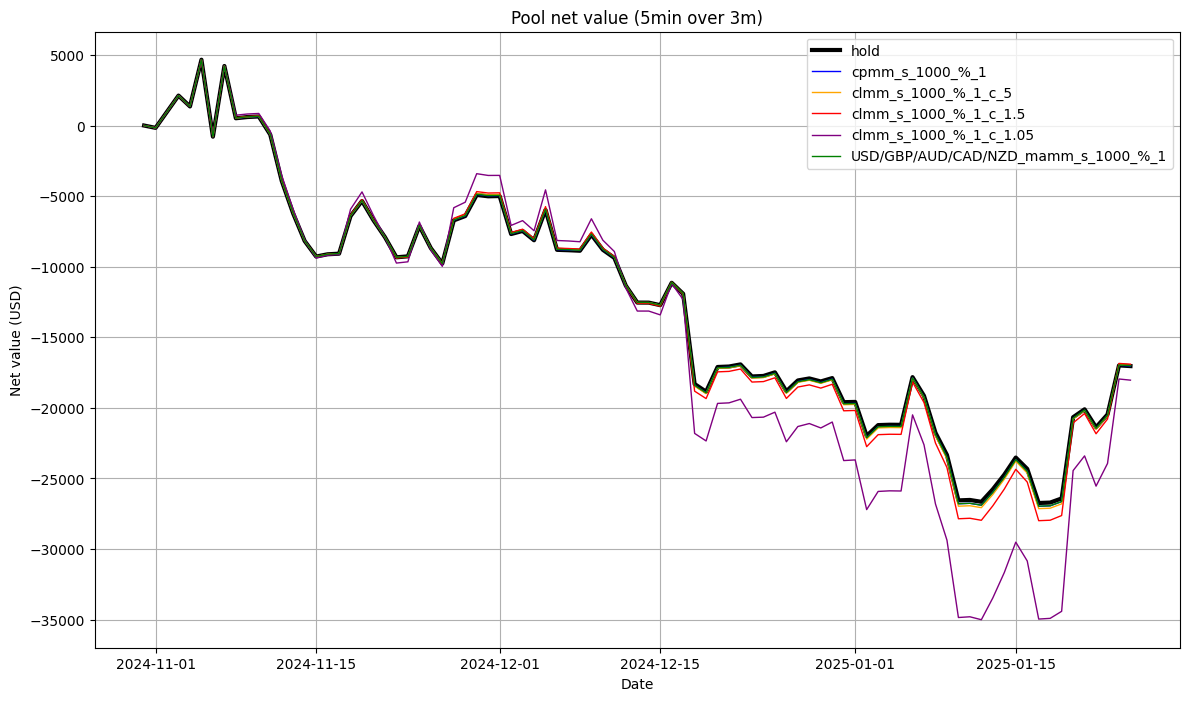

In [197]:
# print("full matrix list")
# print(matrix_list)

if False:
  print("individual matrixes")
  for matrix in matrix_list:
      # print(matrix)
      pool_name = matrix["pool_name"]  # Extract pool name
      data_df = matrix["data"]  # Extract the actual DataFrame
      if False:
        if pool_name == "USD/GBP":
          # Ensure Pandas displays all rows and columns
          pd.set_option("display.max_rows", None)
          pd.set_option("display.max_columns", None)
        else:
          pd.reset_option("display.max_rows")
          pd.reset_option("display.max_columns")

      # Print the full DataFrame
      #print(data_df)

      # Compute summary statistics only for numeric columns
      summary_stats = data_df.select_dtypes(include=['number']).agg(["min", "max", "median", "mean"])

      # Display the result with pool name
      print(f"\nSummary statistics for {pool_name}:")
      print(summary_stats)

  for table in starting_tables:
    pretty_print_table(table)

# Filter pools with only one "/" in their name
individual_pools = [pool for pool in matrix_list if pool['pool_name'].count('/') == 1]

# Extract the dataframes from the filtered pools
dataframes = [pool['data'] for pool in individual_pools]

# Sum the dataframes together, respecting column and row names
result_df = pd.concat(dataframes).groupby(level=0).sum()

mamm_pools = [pool for pool in matrix_list if pool['pool_name'].count('/') > 1]
for pool in mamm_pools:
    # Rename columns to include the pool_name for clarity
    pool_df = pool['data'].add_prefix(f"{pool['pool_name']}_")
    # Merge with result_df on the date index
    result_df = result_df.join(pool_df, on='date', how='outer')

# Output the result
pd.set_option('display.float_format', '{:,.4f}'.format)
output_df = pd.DataFrame(result_df)

if True:
    filtered_columns = [col for col in output_df.columns if not ("/" in col and "hold" in col)]
    output_df = output_df[filtered_columns]


print(output_df)

if False:
  summary_stats = output_df.agg({
      "hold": ["min", "max", "median", "mean"],
      "cpmm, s: 1000, %: 1": ["min", "max", "median", "mean"],
      "clmm, s: 1000, %: 1": ["min", "max", "median", "mean"],
      "USD/GBP/AUD/CAD/NZD_hold": ["min", "max", "median", "mean"],
      "USD/GBP/AUD/CAD/NZD_mamm, s: 1000, %: 1": ["min", "max", "median", "mean"]
  })
  print(summary_stats)

display_df = output_df - total_pool

# Define specific colors based on type keywords
custom_colors = {
    "cpmm": "blue",
    "mamm": "green",
    "clmm_5": "orange",
    "clmm_1.5": "red",
    "clmm_1.05": "purple"
}

# Assign line styles and colors
line_styles = {}
colors = {}
line_widths = {}

for column in display_df.columns:
    # Assign colors based on keyword matching
    if "cpmm" in column:
        colors[column] = custom_colors["cpmm"]
    elif "mamm" in column:
        colors[column] = custom_colors["mamm"]
    elif "clmm" in column:
        if "_5" in column:
            colors[column] = custom_colors["clmm_5"]
        elif "_1.5" in column:
            colors[column] = custom_colors["clmm_1.5"]
        elif "_1.05" in column:
            colors[column] = custom_colors["clmm_1.05"]
        else:
            colors[column] = "gray"  # Default for unspecified CLMM variations

    # Assign line styles
    if "hold" in column:
        colors[column] = "black"  # Holds should be black
        line_styles[column] = "-"  # Solid line for hold
        line_widths[column] = 3
    elif "%_0.3" in column:
        line_styles[column] = ":"  # Dotted line
        line_widths[column] = 1  # Default line width
    elif "%_1" in column:
        line_styles[column] = "-"  # Solid line
        line_widths[column] = 1  # Default line width
    elif "%_3" in column:
        line_styles[column] = "--"  # Dashed line
        line_widths[column] = 1  # Default line width
    else:
        line_styles[column] = "-"  # Default to solid
        line_widths[column] = 1  # Default line width

# Plot the filtered data
plt.figure(figsize=(14, 8))
for column in display_df.columns:
    plt.plot(display_df.index, display_df[column], 
             label=column, 
             color=colors[column], 
             linestyle=line_styles[column], 
             linewidth=line_widths[column])  # Use linewidth to make "hold" bold

# Formatting the plot
plt.xlabel("Date")
plt.ylabel(f"Net value ({base_asset})")
plt.title(f"Pool net value ({time_interval} over {time_period})")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [225]:
if False:
    for matrix in matrix_list:
        print(f"=== Matrix for {matrix['pool_name']} ===")
        # Print end_table
        print("\n--- End Tables ---")
        for variation, table in matrix['end_table'].items():
            print(f"\nVariation: {variation}")
            print(table.to_string())

for matrix in matrix_list:
    print(f"=== Matrix for {matrix['pool_name']} ===")
    # Print summary
    print("\n--- Summary ---")
    for variation, summary in matrix['summary'].items():
        print(f"\nVariation: {variation}")
        print(summary)

=== Matrix for USD/GBP ===

--- Summary ---

Variation: cpmm_s_1000_%_1
{'Type': 'cpmm', 'Order Size': 1000, 'Fee %': 1, 'Final_Pool_Value': np.float64(467620.7444346024), 'Fees': np.float64(89.4885257823971), 'Trades': 9}

Variation: clmm_s_1000_%_1_c_5
{'Type': 'clmm', 'Order Size': 1000, 'Fee %': 1, 'Final_Pool_Value': np.float64(467634.4993678556), 'Fees': np.float64(149.07000016850776), 'Trades': 15}

Variation: clmm_s_1000_%_1_c_1.5
{'Type': 'clmm', 'Order Size': 1000, 'Fee %': 1, 'Final_Pool_Value': np.float64(467768.07640054467), 'Fees': np.float64(497.2793343312161), 'Trades': 50}

Variation: clmm_s_1000_%_1_c_1.05
{'Type': 'clmm', 'Order Size': 1000, 'Fee %': 1, 'Final_Pool_Value': np.float64(467667.58887005044), 'Fees': np.float64(2353.8145135597397), 'Trades': 237}
=== Matrix for USD/AUD ===

--- Summary ---

Variation: cpmm_s_1000_%_1
{'Type': 'cpmm', 'Order Size': 1000, 'Fee %': 1, 'Final_Pool_Value': np.float64(230163.84928112532), 'Fees': np.float64(29.695078976156097),

In [236]:


aggregated_end_tables = {} # Create an ordered dictionary to store aggregated end tables
aggregated_summaries = {} # Create an ordered dictionary to store aggregated summaries


# Iterate over matrices to aggregate end tables
for matrix in matrix_list:
    pool_name = matrix["pool_name"]
    for variation, summary in matrix["summary"].items():
        if variation == "hold" and table["type"].iloc[1] == "mamm":
            pass
        else:
            if variation not in aggregated_summaries:
                aggregated_summaries[variation] = {
                    "Type": summary["Type"],
                    "Order Size": summary["Order Size"],
                    "Fee %": summary["Fee %"],
                    "Final_Pool_Value": summary["Final_Pool_Value"],
                    "Fees": summary["Fees"],
                    "Trades": summary["Trades"],
                }
            else:
                # Sum up numerical values
                aggregated_summaries[variation]["Final_Pool_Value"] += summary["Final_Pool_Value"]
                aggregated_summaries[variation]["Fees"] += summary["Fees"]
                aggregated_summaries[variation]["Trades"] += summary["Trades"]

    for variation, table in matrix["end_table"].items():
        if variation == "hold" and table["type"].iloc[1] == "mamm":
            pass
        else:
            # Create a key based on variation name to aggregate variations separately
            key = f"{variation}"

            if key not in aggregated_end_tables:
                aggregated_end_tables[key] = []

            # Append the table to the corresponding variation
            aggregated_end_tables[key].append(table)

# Now combine all tables for each variation
combined_end_tables = {}
for variation, tables in aggregated_end_tables.items():
    combined_table = pd.concat(tables, axis=0)

    # Use OrderedDict to preserve the order of assets and drop duplicates
    ordered_assets = OrderedDict.fromkeys(combined_table.index)
    ordered_assets_list = list(ordered_assets.keys())

    # Filter to maintain the order
    combined_table = combined_table.loc[ordered_assets_list]

    # Group by asset to sum balances and values, keeping spot rates and recalculating weights
    combined_table = combined_table.groupby(level=0, sort=False).agg(
        {
            "weight": "sum",  # Will be recalculated later
            "spot": "first",  # Keep original spot rates
            "value": "sum",  # Sum values across tables
            "balance": "sum",  # Sum balances across tables
        }
    )

    # Recalculate weights based on the new total value
    total_value = combined_table["value"].sum()
    combined_table["weight"] = combined_table["value"] / total_value

    # Store the combined table
    combined_end_tables[variation] = combined_table

"""
#print(combined_end_tables)
pd.reset_option("display.width") 
print(pd.DataFrame(aggregated_summaries).T)
print()
"""

pd.set_option("display.width", 200)
print(pd.DataFrame(aggregated_summaries).T)
print()

print("Tables")
for starting_table in starting_tables:
    if starting_table["type"].iloc[1] == "mamm":
        print("starting_table")
        pretty_print_table(starting_table.drop(columns=["type"]))
        print()

for variation, combined_table in combined_end_tables.items():
    #print(f"\nVariation: {display_table[variation]}")
    print(f"variation: {variation}")
    #print(combined_table)
    pretty_print_table(combined_table)
    print()


                        Type Order Size Fee % Final_Pool_Value       Fees Trades
cpmm_s_1000_%_1         cpmm       1000     1     982,969.2845   148.8835     15
clmm_s_1000_%_1_c_5     clmm       1000     1     983,016.3308   318.0985     32
clmm_s_1000_%_1_c_1.5   clmm       1000     1     983,092.9296   924.3247     93
clmm_s_1000_%_1_c_1.05  clmm       1000     1     981,962.2780 4,506.4691    454
mamm_s_1000_%_1         mamm       1000     1     982,989.6890   178.9161     18

Tables
starting_table
       weight    spot         value       balance
asset                                            
USD    0.5000  1.0000  500,000.0000  500,000.0000
GBP    0.2376  0.7753  237,616.4787  184,227.3831
AUD    0.1175  1.5198  117,459.5390  178,509.9377
CAD    0.1143  1.3932  114,271.7018  159,203.3350
NZD    0.0307  1.6727   30,652.2805   51,270.8551
                               1000000.0

variation: hold
       weight    spot         value       balance
asset                            

In [136]:

print(f"Base asset: {base_asset}")
print()

# Print the summary for each pool
end_spot_for_summary = {}
combined_summary = None
if True:
    for pool_name, summary_df, in results_summary.items():
        print(f"Summary for {pool_name}:")
        # Find the respective starting table for the pool_name
        starting_table_entry = next(
            table_entry for table_entry in starting_tables_named if table_entry["pool_name"] == pool_name
        )
        starting_table = starting_table_entry["table"]
        print("Starting table (V0):")
        pretty_print_table(starting_table)
        print("   Value:               ", f"{starting_table['value'].sum():,.4f}")
        print()

        print("Hold table (VH):")
        hold_table = starting_table.copy()
        for asset in hold_table.index:
            #print(asset)
            if asset != base_asset and False:
                # Get the next usable date
                max_date = filtered_times.max()
                next_date = unique_times.iloc[unique_times[unique_times == max_date].index[0] + 1]

                # Get the latest spot price before or on the next usable date
                end_spot_for_summary[asset] = asset_data[asset].loc[asset_data[asset]["Local Time"] <= next_date, "Open"].iloc[-1]

                print(f"Spot price: {end_spot_for_summary[asset]:,.4f}")
                #hold_table['spot'][asset] = end_spot_for_summary[asset]
                hold_table.loc[asset, "spot"] = end_spot_for_summary[asset]
        hold_table['value'] = hold_table['balance'] / hold_table['spot']
        pretty_print_table(hold_table)
        print("   Value:               ", f"{hold_table['value'].sum():,.4f}")
        print()

        print(summary_df)
        print()

        # Combine the summaries
        if combined_summary is None:
            combined_summary = summary_df.copy()
        else:
            combined_summary["Final_Pool_Value"] += summary_df["Final_Pool_Value"]
            combined_summary["Fees"] += summary_df["Fees"]
            combined_summary["Trades"] += summary_df["Trades"]

        print()

from collections import OrderedDict

if True:
    print("Combined")
    # Combine the starting tables while preserving the order of assets
    combined_starting_table = pd.concat(
        [entry["table"] for entry in starting_tables_named], axis=0
    )

    # Use OrderedDict to drop duplicates while preserving the order
    ordered_assets = OrderedDict.fromkeys(combined_starting_table.index)

    # Convert OrderedDict keys to a list
    ordered_assets_list = list(ordered_assets.keys())

    # Filter the combined table to match the ordered assets
    combined_starting_table = combined_starting_table.loc[ordered_assets_list]

    # Group by the asset to sum the values and balances, keeping spot rates and recalculating weights
    combined_starting_table = combined_starting_table.groupby(level=0, sort=False).agg(
        {
            "weight": "sum",  # We'll recalculate this later
            "spot": "first",  # Keep the original spot rates
            "value": "sum",  # Sum the values across tables
            "balance": "sum",  # Sum the balances across tables
        }
    )

    # Recalculate weights based on the new total value
    total_value = combined_starting_table["value"].sum()
    combined_starting_table["weight"] = combined_starting_table["value"] / total_value

    # Pretty print the combined table
    print("Combined Starting Table (V0):")
    pretty_print_table(combined_starting_table)
    print("   Value:               ", f"{total_value:,.4f}")
    print()

    # Create the Hold table by copying the Starting table
    combined_hold_table = combined_starting_table.copy()

    # Use the precomputed spot prices from end_spot_for_summary
    for asset in combined_hold_table.index:
        if asset != base_asset:
            combined_hold_table.loc[asset, "spot"] = end_spot_for_summary[asset]
            #combined_hold_table.at[asset, 'spot'] = end_spot_for_summary[asset]

    # Recalculate the values based on the new spot prices
    combined_hold_table['value'] = combined_hold_table['balance'] / combined_hold_table['spot']

    print(f"Hold table (VH) for {pool_name}:")
    pretty_print_table(combined_hold_table)
    print("   Value:               ", f"{combined_hold_table['value'].sum():,.4f}")
    print()

    # Print the combined summary
    print("Combined Summary:")
    print(combined_summary)
    print()

Base asset: USD

Combined
Combined Starting Table (V0):
       weight    spot           value         balance
asset                                                
USD    0.5000  1.0000  1,000,000.0000  1,000,000.0000
GBP    0.2376  0.7753    475,232.9573    368,454.7661
AUD    0.1175  1.5198    234,919.0780    357,019.8753
CAD    0.1143  1.3932    228,543.4036    318,406.6699
NZD    0.0307  1.6727     61,304.5611    102,541.7103
                               2000000.0
   Value:                2,000,000.0000



KeyError: 'GBP'

In [ ]:
"""
# Get the next usable date
max_date = filtered_times.max()
next_date = unique_times.iloc[unique_times[unique_times == max_date].index[0] + 1]

# Get the latest spot price before or on the next usable date
spot = asset_data["EUR"].loc[asset_data["EUR"]["Local Time"] <= next_date, "Open"].iloc[-1]

print(f"Spot price: {spot}")
"""


'\n# Get the next usable date\nmax_date = filtered_times.max()\nnext_date = unique_times.iloc[unique_times[unique_times == max_date].index[0] + 1]\n\n# Get the latest spot price before or on the next usable date\nspot = asset_data["EUR"].loc[asset_data["EUR"]["Local Time"] <= next_date, "Open"].iloc[-1]\n\nprint(f"Spot price: {spot}")\n'

In [ ]:
print(f"Base asset: {base_asset}")
print()

# Print the summary for each pool
end_spot_for_summary = {}
combined_summary = None
if True:
    for pool_name, summary_df, in results_summary.items():
        print(f"Summary for {pool_name}:")
        # Find the respective starting table for the pool_name
        starting_table_entry = next(
            table_entry for table_entry in starting_tables_named if table_entry["pool_name"] == pool_name
        )
        starting_table = starting_table_entry["table"]
        print("Starting table (V0):")
        pretty_print_table(starting_table)
        print("   Value:               ", f"{starting_table['value'].sum():,.4f}")
        print()

        print("Hold table (VH):")
        hold_table = starting_table.copy()
        for asset in hold_table.index:
            #print(asset)
            if asset != base_asset and False:
                # Get the next usable date
                max_date = filtered_times.max()
                next_date = unique_times.iloc[unique_times[unique_times == max_date].index[0] + 1]

                # Get the latest spot price before or on the next usable date
                end_spot_for_summary[asset] = asset_data[asset].loc[asset_data[asset]["Local Time"] <= next_date, "Open"].iloc[-1]

                print(f"Spot price: {end_spot_for_summary[asset]:,.4f}")
                #hold_table['spot'][asset] = end_spot_for_summary[asset]
                hold_table.loc[asset, "spot"] = end_spot_for_summary[asset]
        hold_table['value'] = hold_table['balance'] / hold_table['spot']
        pretty_print_table(hold_table)
        print("   Value:               ", f"{hold_table['value'].sum():,.4f}")
        print()

        print(summary_df)
        print()

        # Combine the summaries
        if combined_summary is None:
            combined_summary = summary_df.copy()
        else:
            combined_summary["Final_Pool_Value"] += summary_df["Final_Pool_Value"]
            combined_summary["Fees"] += summary_df["Fees"]
            combined_summary["Trades"] += summary_df["Trades"]

        print()

from collections import OrderedDict

if True:
    print("Combined")
    # Combine the starting tables while preserving the order of assets
    combined_starting_table = pd.concat(
        [entry["table"] for entry in starting_tables_named], axis=0
    )

    # Use OrderedDict to drop duplicates while preserving the order
    ordered_assets = OrderedDict.fromkeys(combined_starting_table.index)

    # Convert OrderedDict keys to a list
    ordered_assets_list = list(ordered_assets.keys())

    # Filter the combined table to match the ordered assets
    combined_starting_table = combined_starting_table.loc[ordered_assets_list]

    # Group by the asset to sum the values and balances, keeping spot rates and recalculating weights
    combined_starting_table = combined_starting_table.groupby(level=0, sort=False).agg(
        {
            "weight": "sum",  # We'll recalculate this later
            "spot": "first",  # Keep the original spot rates
            "value": "sum",  # Sum the values across tables
            "balance": "sum",  # Sum the balances across tables
        }
    )

    # Recalculate weights based on the new total value
    total_value = combined_starting_table["value"].sum()
    combined_starting_table["weight"] = combined_starting_table["value"] / total_value

    # Pretty print the combined table
    print("Combined Starting Table (V0):")
    pretty_print_table(combined_starting_table)
    print("   Value:               ", f"{total_value:,.4f}")
    print()

    # Create the Hold table by copying the Starting table
    combined_hold_table = combined_starting_table.copy()

    # Use the precomputed spot prices from end_spot_for_summary
    for asset in combined_hold_table.index:
        if asset != base_asset:
            combined_hold_table.loc[asset, "spot"] = end_spot_for_summary[asset]
            #combined_hold_table.at[asset, 'spot'] = end_spot_for_summary[asset]

    # Recalculate the values based on the new spot prices
    combined_hold_table['value'] = combined_hold_table['balance'] / combined_hold_table['spot']

    print(f"Hold table (VH) for {pool_name}:")
    pretty_print_table(combined_hold_table)
    print("   Value:               ", f"{combined_hold_table['value'].sum():,.4f}")
    print()

    # Print the combined summary
    print("Combined Summary:")
    print(combined_summary)
    print()


Base asset: USD

Summary for USD/GBP:
Starting table (V0):
       weight    spot         value       balance
asset                                            
USD    0.5000  1.0000  237,616.4800  237,616.4800
GBP    0.5000  0.7477  237,616.4800  177,670.4651
   Value:                475,232.9600

Hold table (VH):
Spot price: 0.7854
       weight    spot         value       balance
asset                                            
USD    0.5000  1.0000  237,616.4800  237,616.4800
GBP    0.5000  0.7854  226,227.8032  177,670.4651
   Value:                463,844.2832

    Order Size  Fee %  Final_Pool_Value        Fees  Trades
0          100    0.1     463749.704412   45.495725     455
1          100    0.5     463756.998069   51.856397     104
2          100    1.0     463776.713484   67.355312      68
3          100    1.5     463797.390912   91.661406      62
4          100    2.0     463815.081873  109.849729      56
5          100    2.5     463829.831162  121.999637      50
6      

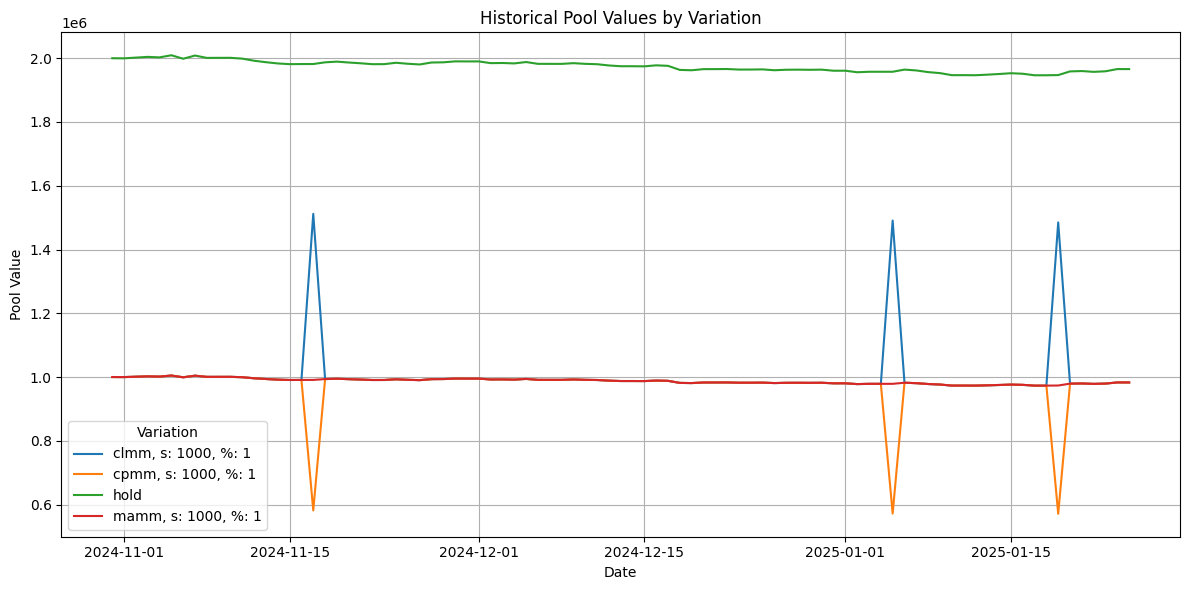

In [80]:
if False:
    # Print the updated list of matrices
    for matrix in matrix_list:
        print(f"Updated Matrix for {matrix['pool_name']}:")
        print(matrix['data'])

# Initialize an empty DataFrame for the result matrix
result_matrix = None

# Iterate over the matrices in the matrix_list
for matrix in matrix_list:
    # Access the data of the current matrix
    data = matrix["data"]

    # If result_matrix is None, initialize it with the current matrix's data
    if result_matrix is None:
        result_matrix = data.copy()
    else:
        # Sum the values for columns with the same names
        result_matrix = result_matrix.add(data, fill_value=0)

if False:
    # Print the resulting matrix
    print("Result Matrix:")
    print(result_matrix)


# Plot the unified historical values for each variation
plt.figure(figsize=(12, 6))
for column in result_matrix.columns:
    plt.plot(result_matrix.index, result_matrix[column], label=column)

# Customize the plot
plt.title("Historical Pool Values by Variation")
plt.xlabel("Date")
plt.ylabel("Pool Value")
plt.legend(title="Variation")
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
print(f"Base asset: {base_asset}")

print("Starting table (V0):")
pretty_print_table(starting_table)
print("   Value:               ", f"{starting_table['value'].sum():,.4f}")
print()

#print(sim_table)

print("Hold table (VH):")
hold_table = starting_table.copy()
hold_table['spot'] = sim_table['spot']
hold_table['value'] = hold_table['balance'] / hold_table['spot']
pretty_print_table(hold_table)
print("   Value:               ", f"{hold_table['value'].sum():,.4f}")
print()

print("Summary: ")
#print(results_df)
pretty_print_table(results_df)

#print()
#print(historical_values_df)

if False:
  print()
  print()
  print("End tables:")
  table_index = 1
  for result, table in zip(results, result_tables):
      # Print the summary for the table
      print(f"    Table: {table_index}")
      table_index += 1
      print(json.dumps(result, indent=4))
      # Print the table
      pretty_print_table(table)
      print("   Value:               ", f"{table['value'].sum():,.4f}")

Base asset: USD
Starting table (V0):
       weight    spot        value      balance
asset                                          
USD    0.5000  1.0000  30,652.2800  30,652.2800
NZD    0.5000  1.5753  30,652.2800  48,286.5154
   Value:                61,304.5600

Hold table (VH):
       weight    spot        value      balance
asset                                          
USD    0.5000  1.0000  30,652.2800  30,652.2800
NZD    0.5000  1.6889  28,590.4458  48,286.5154
   Value:                59,242.7258

Summary: 
     Order Size   Fee % Final_Pool_Value     Fees    Trades
0      100.0000  0.1000      59,219.7772  12.9945  130.0000
1      100.0000  0.5000      59,217.3482  10.4761   21.0000
2      100.0000  1.0000      59,219.4767  11.8881   12.0000
3      100.0000  1.5000      59,223.1577  16.2654   11.0000
4      100.0000  2.0000      59,228.5707  21.5877   11.0000
5      100.0000  2.5000      59,231.3915  24.4245   10.0000
6      100.0000  3.0000      59,233.8816  26.2271    9.0